# Exercise 1

This notebook shows how we can perform linear regression on a dataset.

For this, we generate an artificial dataset using sklearn.

In [2]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [ ]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with 2 features per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

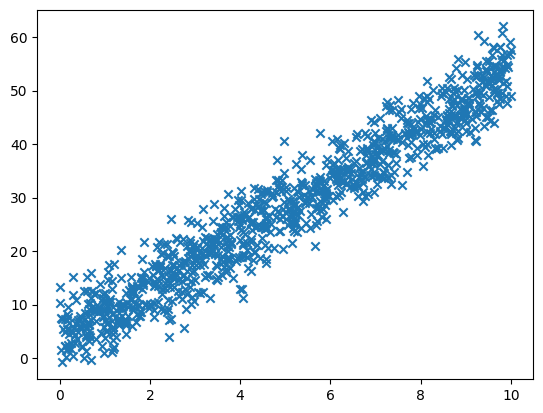

In [ ]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Linear regression with sklearn

Linear regression is built-in with sklearn using the `LinearRegression` class:

In [ ]:
from sklearn.linear_model import LinearRegression

You can find help on this class on https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html or by typing

In [ ]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(
 |      *,
 |      fit_intercept=True,
 |      copy_X=True,
 |      tol=1e-06,
 |      n_jobs=None,
 |      positive=False
 |  )
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  tol : float, default=1e-6
 |      The precision of the

In [ ]:
reg = LinearRegression()

reg.fit(X, y);

In [ ]:
print("learned coefficient:", reg.coef_.item())
print("learned bias:", reg.intercept_.item())

learned coefficient: 4.961184935009602
learned bias: 3.308668997296266


We can see that sklearn was able to approximate the parameters of the ground truth with good accurracy. We can also plot the fitted data versus the training data and the ground truth, from which we can also see that it fits very good to the data. As we normally do not have access to the parameters of the ground truth distribution, visualizing the results is always recommended to check if the fitting produced reasonable results.

MSE: 0.02621999969086195


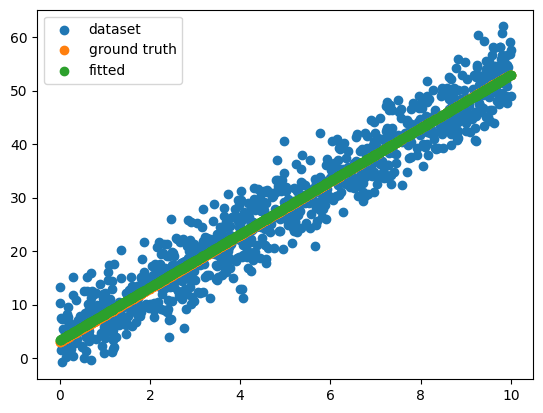

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = reg.predict(X)

print("MSE:", mean_squared_error(ground_truth, predictions))

plt.figure()
plt.scatter(X, y, label='dataset')
plt.scatter(X, ground_truth, label='ground truth')
plt.scatter(X, predictions, label='fitted')
plt.legend()
plt.show()

## Linear regression without sklearn

As shown in the slides of the lecture, the solution to the linear regression problem can be calculated in closed form:

$ w = (X^T X)^{-1} X^T y $

We can implement this formula using the `numpy` library, which can perform computations with multi-dimensional arrays very efficently.

As the `X` and `y` variables are already instances of the numpy `ndarray` class, we can use them directly for the computation of the weights.

To implement the formula, we can use the following numpy methods:

|Operation|numpy equivalent|
|---------|-----------|
|$X^T$|`X.transpose()` or `X.T` for short|
|$X^{-1}$|`np.linalg.pinv(X)`|
|$Xy$|`np.matmul(X, y)` or `X @ y` for short|

In [ ]:
temp_weights = (np.linalg.pinv(X_.T @ X_) @ X_.T) @ y
temp_weights.shape

(2, 1)

But first, we will use a trick to artificially increase our `X` dataset features by a vector of ones. This will allow us to learn a bias value along with the linear regression:

In [3]:
ones = np.ones(X.shape[0]) # create a vector of ones with the same length as the dataset
X_ = np.c_[X, ones] # concatenate the ones with the dataset
X_.shape

(1000, 2)

The calculation of the weights can then be done with:

In [ ]:
weights = np.matmul(np.matmul(np.linalg.pinv(np.matmul(X_.transpose(), X_)), X_.transpose()), y)
print(weights.shape)

(2, 1)


or shorter (and cleaner):

In [ ]:
weights = (np.linalg.pinv(X_.T @ X_) @ X_.T) @ y
print(weights.shape)

(2, 1)


We can instead also use the numpy `matrix` class, which has a `.I` attribute, which corresponds to the inverse of the matrix:

In [ ]:
X_mat = np.matrix(X_)
y_mat = np.matrix(y)

print(X_mat.shape)
print(y_mat.shape)

weights = ((X_mat.T @ X_mat).I @ X_mat.T) @ y_mat
print(weights.shape)

(1000, 2)
(1000, 1)
(2, 1)


Note that the weights are also a 2D `np.matrix`, instead of a 1D `ndarray`. This is because matrix operations always yield matrix instances. You can convert back to a `np.ndarray` using `np.array(weights)`.

In [ ]:
print(f"learned coefficient:", weights[0, 0])
print(f"learned bias:", weights[1, 0])

learned coefficient: 4.961184935009608
learned bias: 3.3086689972962358


In [ ]:
predictions = X_mat @ weights
residuals = ground_truth - predictions

print("MSE:", np.mean(np.power(residuals, 2)))

MSE: 0.026219999690858007


As you can see, we get almost the same results as with sklearn.